# **Question 1**

## **Preprocessing**

In [1]:
import pandas as pd
from google.colab import drive
import numpy as np

ImportError: dlopen(/Users/swapno/miniconda3/envs/tf/lib/python3.10/site-packages/pandas/_libs/interval.cpython-310-darwin.so, 0x0002): tried: '/Users/swapno/miniconda3/envs/tf/lib/python3.10/site-packages/pandas/_libs/interval.cpython-310-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64e')), '/usr/local/lib/interval.cpython-310-darwin.so' (no such file), '/usr/lib/interval.cpython-310-darwin.so' (no such file)

In [ ]:
!pip install mat4py
from mat4py import loadmat

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = loadmat('/content/gdrive/MyDrive/Important/ALL SEMS/Sem - 8/MLFA/Lab Assignments/Assignment-4/annualrainfall.mat')

In [ ]:
df1 = pd.DataFrame(data)
print(df1.head())

                                                  XR
0  [0.7190224550298003, 2.5721951935623513, 5.115...
1  [0.7999717984043184, 2.358573305924408, 4.4593...
2  [1.11637881764623, 3.8175709655538936, 5.71581...
3  [0.7644883531649582, 2.5443221942567433, 5.017...
4  [0.9233830457583803, 1.7770276811034953, 3.644...


In [ ]:
df = pd.DataFrame()
cities=[]
for i in range(len(df1)):
  city = "city"+str(i)
  cities.append(city)
df['Cities']=cities

for j in range(len(df1['XR'][0])):
  lst = []
  for i in range(len(df1)):
    lst.append(df1['XR'][i][j])
  col_name = "year"+str(j)
  df[col_name]=lst

print(df.head())

  Cities     year0     year1     year2  ...   year114   year115   year116   year117
0  city0  0.719022  2.572195  5.115582  ...  2.746204  2.418939  3.602588  0.274935
1  city1  0.799972  2.358573  4.459389  ...  2.879098  2.404098  2.857377  0.133504
2  city2  1.116379  3.817571  5.715812  ...  3.584699  4.593279  5.954699  3.754372
3  city3  0.764488  2.544322  5.017730  ...  2.883681  3.478614  4.827943  1.997839
4  city4  0.923383  1.777028  3.644102  ...  4.158557  2.259016  3.436328  0.772230

[5 rows x 119 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]


In [ ]:
rainfalls = df.select_dtypes(np.number).sum(axis = 0, skipna = True)
print(rainfalls)

year0      2419.465229
year1      2512.018018
year2      2667.357994
year3      2327.246610
year4      2306.637001
              ...     
year113    2320.219852
year114    2307.336725
year115    2568.183404
year116    2575.166233
year117    2379.061657
Length: 118, dtype: float64


## **Part 1**

In [ ]:
mean_rainfall = rainfalls.mean()
SD_rainfall = np.std(rainfalls)
print("Mean and SD of the data is:")
print(mean_rainfall)
print(SD_rainfall)

Mean and SD of the data is:
2731.5638988707724
266.89890593445193


## **Part 2**

In [ ]:
upper = mean_rainfall + SD_rainfall
lower = mean_rainfall - SD_rainfall
years = df.keys()
years = years[1:]
print(years)
labels={}
for i in range(len(years)):
  if rainfalls[i]>upper:
    l=1
  elif rainfalls[i]>lower:
    l=0
  else:
    l=-1
  labels[years[i]]=l

print(labels)

Index(['year0', 'year1', 'year2', 'year3', 'year4', 'year5', 'year6', 'year7',
       'year8', 'year9',
       ...
       'year108', 'year109', 'year110', 'year111', 'year112', 'year113',
       'year114', 'year115', 'year116', 'year117'],
      dtype='object', length=118)
{'year0': -1, 'year1': 0, 'year2': 0, 'year3': -1, 'year4': -1, 'year5': 0, 'year6': 0, 'year7': 0, 'year8': 0, 'year9': 0, 'year10': -1, 'year11': 0, 'year12': -1, 'year13': 0, 'year14': -1, 'year15': 1, 'year16': 1, 'year17': -1, 'year18': 0, 'year19': 0, 'year20': 1, 'year21': 1, 'year22': 0, 'year23': 1, 'year24': 0, 'year25': 0, 'year26': 0, 'year27': 0, 'year28': 0, 'year29': 0, 'year30': 0, 'year31': 0, 'year32': 1, 'year33': 1, 'year34': 0, 'year35': 1, 'year36': 0, 'year37': 1, 'year38': 0, 'year39': 0, 'year40': 0, 'year41': 1, 'year42': 0, 'year43': 0, 'year44': 0, 'year45': 0, 'year46': 0, 'year47': 1, 'year48': 1, 'year49': 0, 'year50': -1, 'year51': -1, 'year52': 0, 'year53': 0, 'year54': 0, 'year55': 0

In [ ]:
df2 = df.T
df2 = df2[1:]

df2["label"] = [0]*len(df2)
for i in range(len(df2)):
  key = "year"+str(i)
  df2["label"][i] = labels[key]

print(df2)

                0         1         2  ...        355        356 label
year0    0.719022  0.799972  1.116379  ...  10.399852  11.287784    -1
year1    2.572195  2.358573  3.817571  ...   9.187904   9.791919     0
year2    5.115582  4.459389  5.715812  ...   8.054785   8.523733     0
year3    0.509786  0.649587  1.357004  ...   8.654893   9.182062    -1
year4    0.600234  1.078375  1.584306  ...   9.524974  10.185022    -1
...           ...       ...       ...  ...        ...        ...   ...
year113  1.366868  1.186168  6.823443  ...  10.736066   6.441639    -1
year114  2.746204  2.879098  3.584699  ...   11.47377   6.884262    -1
year115  2.418939  2.404098  4.593279  ...  11.768852   7.061311     0
year116  3.602588  2.857377  5.954699  ...  11.990656    7.19459     0
year117  0.274935  0.133504  3.754372  ...   6.316393   3.789836    -1

[118 rows x 358 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


## **Part 3**

In [ ]:
Train = df2[0:100]
Test = df2[100:]
Y_train = Train["label"]
X_train = Train.drop(columns=['label'])
Y_test = Test["label"]
X_test = Test.drop(columns=['label'])
print(X_train)
print(Y_train)

             0         1         2    ...        354        355        356
year0   0.719022  0.799972  1.116379  ...  12.512038  10.399852  11.287784
year1   2.572195  2.358573  3.817571  ...  10.737137   9.187904   9.791919
year2   5.115582  4.459389  5.715812  ...   9.214482   8.054785   8.523733
year3   0.509786  0.649587  1.357004  ...   9.926839   8.654893   9.182062
year4   0.600234  1.078375  1.584306  ...  11.189535   9.524974  10.185022
...          ...       ...       ...  ...        ...        ...        ...
year95  0.695989  0.260047   3.51531  ...    9.56246   8.461036   8.981769
year96  2.266583  2.006215  4.830554  ...   7.338278   6.739559   6.896489
year97  1.143928  0.839951  6.477249  ...  16.409836  16.409836  16.409836
year98  0.591627  0.563115   2.04277  ...  10.986374   9.318527  10.046574
year99  2.311478  2.158197  4.144834  ...  11.538492   9.778631  10.612755

[100 rows x 357 columns]
year0    -1
year1     0
year2     0
year3    -1
year4    -1
         ..
ye

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10)
scores = cross_val_score(clf, X_train, Y_train, cv=5)
print(scores)

[0.5  0.65 0.45 0.5  0.55]


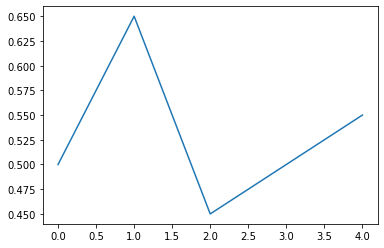

In [ ]:
import matplotlib.pyplot as plt
plt.plot(scores)

[Text(0.30625, 0.9375, 'X[17] <= 2.413\ngini = 0.534\nsamples = 100\nvalue = [17, 63, 20]'),
 Text(0.1, 0.8125, 'X[102] <= 2.077\ngini = 0.292\nsamples = 12\nvalue = [10, 1, 1]'),
 Text(0.05, 0.6875, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0]'),
 Text(0.15, 0.6875, 'X[203] <= 3.832\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.2, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5125, 0.8125, 'X[122] <= 7.379\ngini = 0.451\nsamples = 88\nvalue = [7, 62, 19]'),
 Text(0.4625, 0.6875, 'X[235] <= 5.595\ngini = 0.385\nsamples = 81\nvalue = [7, 62, 12]'),
 Text(0.3, 0.5625, 'X[350] <= 27.698\ngini = 0.375\nsamples = 8\nvalue = [6, 2, 0]'),
 Text(0.25, 0.4375, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.35, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.625, 0.5625, 'X[262] <= 12.517\ngini = 0.297\nsamples = 73\nvalue = [1, 60, 12]'),
 Text(0.45, 0.4375, 'X[252] <= 9.28\ngini 

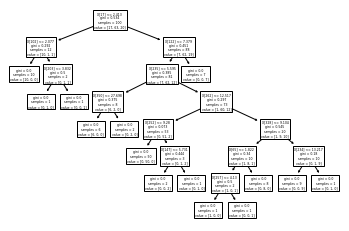

In [ ]:
clf = clf.fit(X_train, Y_train)
tree.plot_tree(clf)

In [ ]:
clf.score(X_test, Y_test)

0.5555555555555556

In [ ]:
clf.score(X_train, Y_train)

1.0

## **Part 4**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=20)
rfc_scores = cross_val_score(rfc, X_train, Y_train, cv=5)
print(rfc_scores)

[0.8  0.75 0.65 0.55 0.65]


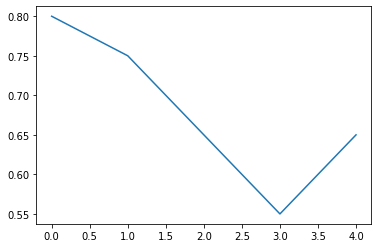

In [ ]:
import matplotlib.pyplot as plt
plt.plot(rfc_scores)

In [ ]:
rfc = rfc.fit(X_train, Y_train)

In [ ]:
print(rfc.score(X_test, Y_test))
print(rfc.score(X_train, Y_train))

0.6111111111111112
1.0


## **part 5,6,7**

In [ ]:
df2=df2.drop(columns=['label'])

In [ ]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356
year0,0.719022,0.799972,1.116379,0.764488,0.923383,0.96133,0.558784,1.043538,2.035055,2.412407,1.020116,0.924422,0.411267,0.650088,0.555744,0.554543,2.877468,2.251094,2.765226,1.270153,1.197197,0.460204,0.668471,1.115757,0.853759,20.823211,12.842759,10.186025,3.183341,3.603291,3.697479,1.522895,0.377089,1.061575,1.685172,1.210726,1.138643,0.711443,20.567445,20.212346,...,18.456558,19.274612,19.248007,16.827436,19.116202,19.320298,9.572131,9.570068,11.274389,12.93558,12.699997,12.591806,9.572131,9.572131,9.679259,12.911017,12.990983,12.791377,12.69159,9.572131,12.226687,12.990302,12.990959,12.89118,12.791385,12.145931,12.566004,12.775478,12.835125,12.812802,13.020404,12.291794,12.565416,12.688719,12.852414,11.667012,12.174392,12.512038,10.399852,11.287784
year1,2.572195,2.358573,3.817571,2.544322,1.777028,1.908791,0.716344,3.693454,6.15136,4.426207,2.826211,2.506872,1.352286,0.986218,0.711302,0.710504,4.075968,4.490216,5.209842,5.144497,2.453501,1.342684,1.213666,1.390022,1.063347,17.347059,13.903304,15.428416,9.043351,7.07042,6.247996,2.793974,1.04529,1.244727,1.989387,1.260894,1.189412,2.382547,24.876621,22.071349,...,27.681964,30.274388,28.990351,25.026741,29.28862,29.365402,9.718852,9.718281,10.6373,11.678557,11.012375,10.680334,9.718852,9.718852,9.747912,10.654541,10.680327,10.680328,10.680328,9.718852,10.465386,10.679795,10.680367,10.680328,10.680328,10.680328,10.680328,10.680328,10.680328,10.680328,11.486169,10.682952,10.680328,10.680328,11.080315,10.11283,10.391051,10.737137,9.187904,9.791919
year2,5.115582,4.459389,5.715812,5.01773,3.644102,3.15249,1.511983,5.075399,7.259941,4.552429,2.268471,2.031172,1.322465,1.022786,1.522687,1.52532,5.151207,5.062471,4.150778,2.916549,2.198392,1.30654,0.957963,1.034741,1.330071,20.172346,15.009085,15.966569,5.793411,5.338131,5.632151,4.311718,2.543007,2.662746,1.228444,1.809276,1.818422,4.705132,21.223444,22.134132,...,16.150828,24.475677,22.107674,20.198222,23.634674,23.1656,7.917213,7.912404,8.883139,9.987368,9.468898,9.213939,7.917213,7.917213,7.952365,9.183067,9.213934,9.213934,9.213934,7.917213,8.924048,9.21356,9.213934,9.213934,9.213934,9.213934,9.213934,9.213934,9.213934,9.213934,9.685181,9.213934,9.213934,9.213934,9.445984,8.772028,8.985728,9.214482,8.054785,8.523733
year3,0.509786,0.649587,1.357004,0.58474,0.878721,0.927881,0.00206,1.601084,2.431932,2.139452,0.971898,1.070565,0.634705,0.125983,0.001367,0.001229,2.210642,2.15202,2.268938,1.991877,1.592787,0.676388,0.37148,0.177228,0.091759,12.951422,8.423454,6.669177,2.49554,1.961912,2.005421,1.569623,0.675735,0.975794,0.505696,1.093725,1.047559,0.465532,20.586835,21.068474,...,16.785243,17.156677,16.683811,14.877937,16.722553,16.800944,8.42541,8.423881,9.312998,10.345126,10.103128,9.97787,8.42541,8.42541,8.471533,9.9452,9.984425,9.984426,9.984426,8.42541,9.635902,9.983663,9.984426,9.984426,9.977869,9.984426,9.984426,9.984426,9.984426,9.984426,10.28164,9.984426,9.984426,9.977869,10.129921,9.474487,9.726133,9.926839,8.654893,9.182062
year4,0.600234,1.078375,1.584306,0.753628,1.811034,2.033962,0.33266,1.851805,3.144972,3.733844,2.33014,3.008399,0.967045,0.606373,0.328647,0.32808,3.187606,2.727223,5.767491,6.42589,6.443947,0.807959,0.807527,0.490327,0.387966,9.705484,7.69505,6.489703,4.324101,5.530998,7.122308,3.181993,2.170939,0.780239,0.481825,0.481873,0.809099,0.590865,11.900142,13.083758,...,26.309828,33.316699,29.036056,27.236831,30.983271,30.627263,10.491803,10.491053,11.345654,12.290508,11.533414,11.156565,10.481147,10.491803,10.510888,11.138133,11.156557,11.156557,11.156557,10.491803,11.007949,11.156123,11.156557,11.156557,11.156557,11.156557,11.156557,11.156557,11.156557,11.156557,11.91907,11.156557,11.156557,11.156557,11.543451,10.539118,10.844063,

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356
year0,0.719022,0.799972,1.116379,0.764488,0.923383,0.96133,0.558784,1.043538,2.035055,2.412407,1.020116,0.924422,0.411267,0.650088,0.555744,0.554543,2.877468,2.251094,2.765226,1.270153,1.197197,0.460204,0.668471,1.115757,0.853759,20.823211,12.842759,10.186025,3.183341,3.603291,3.697479,1.522895,0.377089,1.061575,1.685172,1.210726,1.138643,0.711443,20.567445,20.212346,...,18.456558,19.274612,19.248007,16.827436,19.116202,19.320298,9.572131,9.570068,11.274389,12.93558,12.699997,12.591806,9.572131,9.572131,9.679259,12.911017,12.990983,12.791377,12.69159,9.572131,12.226687,12.990302,12.990959,12.89118,12.791385,12.145931,12.566004,12.775478,12.835125,12.812802,13.020404,12.291794,12.565416,12.688719,12.852414,11.667012,12.174392,12.512038,10.399852,11.287784
year1,2.572195,2.358573,3.817571,2.544322,1.777028,1.908791,0.716344,3.693454,6.15136,4.426207,2.826211,2.506872,1.352286,0.986218,0.711302,0.710504,4.075968,4.490216,5.209842,5.144497,2.453501,1.342684,1.213666,1.390022,1.063347,17.347059,13.903304,15.428416,9.043351,7.07042,6.247996,2.793974,1.04529,1.244727,1.989387,1.260894,1.189412,2.382547,24.876621,22.071349,...,27.681964,30.274388,28.990351,25.026741,29.28862,29.365402,9.718852,9.718281,10.6373,11.678557,11.012375,10.680334,9.718852,9.718852,9.747912,10.654541,10.680327,10.680328,10.680328,9.718852,10.465386,10.679795,10.680367,10.680328,10.680328,10.680328,10.680328,10.680328,10.680328,10.680328,11.486169,10.682952,10.680328,10.680328,11.080315,10.11283,10.391051,10.737137,9.187904,9.791919
year2,5.115582,4.459389,5.715812,5.01773,3.644102,3.15249,1.511983,5.075399,7.259941,4.552429,2.268471,2.031172,1.322465,1.022786,1.522687,1.52532,5.151207,5.062471,4.150778,2.916549,2.198392,1.30654,0.957963,1.034741,1.330071,20.172346,15.009085,15.966569,5.793411,5.338131,5.632151,4.311718,2.543007,2.662746,1.228444,1.809276,1.818422,4.705132,21.223444,22.134132,...,16.150828,24.475677,22.107674,20.198222,23.634674,23.1656,7.917213,7.912404,8.883139,9.987368,9.468898,9.213939,7.917213,7.917213,7.952365,9.183067,9.213934,9.213934,9.213934,7.917213,8.924048,9.21356,9.213934,9.213934,9.213934,9.213934,9.213934,9.213934,9.213934,9.213934,9.685181,9.213934,9.213934,9.213934,9.445984,8.772028,8.985728,9.214482,8.054785,8.523733
year3,0.509786,0.649587,1.357004,0.58474,0.878721,0.927881,0.00206,1.601084,2.431932,2.139452,0.971898,1.070565,0.634705,0.125983,0.001367,0.001229,2.210642,2.15202,2.268938,1.991877,1.592787,0.676388,0.37148,0.177228,0.091759,12.951422,8.423454,6.669177,2.49554,1.961912,2.005421,1.569623,0.675735,0.975794,0.505696,1.093725,1.047559,0.465532,20.586835,21.068474,...,16.785243,17.156677,16.683811,14.877937,16.722553,16.800944,8.42541,8.423881,9.312998,10.345126,10.103128,9.97787,8.42541,8.42541,8.471533,9.9452,9.984425,9.984426,9.984426,8.42541,9.635902,9.983663,9.984426,9.984426,9.977869,9.984426,9.984426,9.984426,9.984426,9.984426,10.28164,9.984426,9.984426,9.977869,10.129921,9.474487,9.726133,9.926839,8.654893,9.182062
year4,0.600234,1.078375,1.584306,0.753628,1.811034,2.033962,0.33266,1.851805,3.144972,3.733844,2.33014,3.008399,0.967045,0.606373,0.328647,0.32808,3.187606,2.727223,5.767491,6.42589,6.443947,0.807959,0.807527,0.490327,0.387966,9.705484,7.69505,6.489703,4.324101,5.530998,7.122308,3.181993,2.170939,0.780239,0.481825,0.481873,0.809099,0.590865,11.900142,13.083758,...,26.309828,33.316699,29.036056,27.236831,30.983271,30.627263,10.491803,10.491053,11.345654,12.290508,11.533414,11.156565,10.481147,10.491803,10.510888,11.138133,11.156557,11.156557,11.156557,10.491803,11.007949,11.156123,11.156557,11.156557,11.156557,11.156557,11.156557,11.156557,11.156557,11.156557,11.91907,11.156557,11.156557,11.156557,11.543451,10.539118,10.844063,

In [ ]:
lower=df2.mean(axis=0)-df2.std(axis=0)

lower

0       0.835500
1       0.786728
2       2.340360
3       1.312981
4       1.155151
         ...    
352    10.760138
353    10.714363
354     9.440208
355     8.923617
356     8.958595
Length: 357, dtype: float64

In [ ]:
upper=df2.mean(axis=0)+df2.std(axis=0)
upper

0       4.923457
1       4.810033
2       7.016313
3       5.193274
4       4.577142
         ...    
352    26.765635
353    28.000465
354    29.195646
355    28.330427
356    29.172628
Length: 357, dtype: float64

In [ ]:
def add_ep(val):
    return float(val)


df_final=pd.DataFrame(columns = df2.columns,index =df2.index)
for row in df2.index:
    upper_label=np.array(list(map(int,df2.loc[row]>upper)), )
    lower_label=np.array(list(map(int,df2.loc[row]<lower)))
    df_final.loc[row] = [str(val) for val in upper_label-lower_label]
#df_final.head()  
df_final.dropna(inplace=True)

In [ ]:
df_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356
year0,-1,0,-1,-1,-1,0,0,-1,-1,-1,-1,-1,-1,0,0,0,0,-1,0,-1,-1,-1,0,0,0,0,0,-1,-1,0,0,-1,-1,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
year1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1,0,0,0,0,0,1,0,...,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,-1,1,0,0,-1,-1,-1,0,-1,-1,-1,-1,-1,0,0,0
year2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,-1,-1,0,0,0,0,-1,-1,-1,0,0,0,0,0,0,0,0,0,-1,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
year3,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,-1,0,0,...,0,0,0,0,0,0,0,-1,0,0,0,0,0,-1,-1,0,0,0,0,0,1,1,0,0,-1,1,0,0,-1,-1,-1,0,-1,-1,-1,-1,-1,0,-1,0
year4,-1,0,-1,-1,0,0,0,-1,-1,0,0,0,0,0,0,0,0,-1,0,1,1,0,0,-1,-1,-1,-1,-1,-1,0,0,0,0,-1,-1,-1,0,-1,-1,-1,...,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,-1,1,1,0,0,-1,0,0,0,-1,0,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
year113,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,0,-1
year114,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,1,1,1,0,-1,-1,...,0,0,1,1,0,0,0,-1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,0,-1
year115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,-1,0,0,-1,1,-1,-1,-1,0,0,0,0,0,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
year116,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1


In [ ]:
Train2 = df_final[0:100]
Test2 = df_final[100:]


In [ ]:
X_train.shape

(100, 357)

In [ ]:
def regional_classifier(col=21):
    Y_train2 = Train2[col]
   
    X_train2 = Train2.drop(columns=[col])
    print(X_train2.shape)
    Y_test2 = Test2[col]
    X_test2 = Test2.drop(columns=[col])
   
    clf2 = tree.DecisionTreeClassifier(max_depth=10, criterion="gini")
    scores2 = cross_val_score(clf2, X_train2, Y_train2, cv=5)
    print(f"Scores for city{col}:")
    print(scores2)
    clf2 = clf.fit(X_train2, Y_train2)
    tree.plot_tree(clf2)
    print(clf2.score(X_test2, Y_test2))
    print(clf2.score(X_train2, Y_train2))
    
    rfc2 = RandomForestClassifier(max_depth=10,criterion="gini")
    rfc_scores2 = cross_val_score(rfc2, X_train2, Y_train2, cv=5)
    print(rfc_scores2)
    rfc2 = rfc2.fit(X_train2, Y_train2)
    print(rfc2.score(X_test2, Y_test2))
    print(rfc2.score(X_train2, Y_train2))
    


(100, 356)
Scores for city0:
[0.8  0.8  0.95 0.95 0.9 ]
0.9444444444444444
1.0
[0.75 0.95 0.9  1.   0.8 ]
0.9444444444444444
1.0
(100, 356)
Scores for city1:
[0.8  0.95 1.   0.75 0.85]
0.8333333333333334
1.0
[0.95 0.85 0.9  1.   0.9 ]
0.8333333333333334
1.0
(100, 356)
Scores for city2:
[0.95 0.85 0.85 0.85 0.65]
0.8333333333333334
1.0
[0.85 0.8  0.75 0.75 0.7 ]
0.6666666666666666
1.0
(100, 356)
Scores for city3:
[0.75 0.75 0.6  0.65 0.5 ]
0.5555555555555556
1.0
[0.75 0.95 0.8  0.75 0.75]
0.6111111111111112
1.0
(100, 356)
Scores for city4:
[0.9  0.85 0.85 0.75 0.7 ]
0.9444444444444444
1.0
[0.85 0.75 0.95 0.9  0.7 ]
0.7222222222222222
1.0
(100, 356)
Scores for city5:
[0.75 0.95 1.   0.9  0.9 ]
0.8333333333333334
1.0
[0.75 0.9  0.85 0.85 0.85]
0.8333333333333334
1.0
(100, 356)
Scores for city6:
[0.95 0.9  0.85 0.8  0.9 ]
0.6111111111111112
1.0
[0.95 0.95 0.85 0.95 0.85]
0.6111111111111112
1.0
(100, 356)
Scores for city7:
[0.85 0.7  0.75 0.8  0.8 ]
0.8888888888888888
1.0
[0.85 0.85 0.75 0.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Scores for city167:
[0.9  1.   1.   0.95 0.95]
0.7777777777777778
1.0
[1.   1.   1.   1.   0.95]
0.7777777777777778
1.0
(100, 356)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Scores for city168:
[0.65 0.7  0.9  0.9  0.85]
0.5555555555555556
1.0
[0.9  0.9  0.9  0.9  0.85]
0.6666666666666666
1.0
(100, 356)
Scores for city169:
[0.55 0.65 0.65 0.55 0.6 ]
0.6666666666666666
1.0
[0.75 0.75 0.75 0.75 0.75]
0.5555555555555556
1.0
(100, 356)
Scores for city170:
[0.55 0.65 0.6  0.6  0.4 ]
0.5
1.0
[0.65 0.7  0.75 0.6  0.65]
0.6111111111111112
1.0
(100, 356)
Scores for city171:
[0.55 0.65 0.65 0.5  0.4 ]
0.6666666666666666
1.0
[0.75 0.8  0.7  0.75 0.65]
0.8333333333333334
1.0
(100, 356)
Scores for city172:
[0.45 0.65 0.55 0.6  0.25]
0.4444444444444444
1.0
[0.75 0.75 0.7  0.75 0.7 ]
0.6666666666666666
1.0
(100, 356)
Scores for city173:
[0.7  0.65 0.8  0.55 0.3 ]
0.5
1.0
[0.75 0.8  0.7  0.8  0.65]
0.7777777777777778
1.0
(100, 356)
Scores for city174:
[0.35 0.6  0.65 0.7  0.35]
0.5555555555555556
1.0
[0.7  0.8  0.7  0.7  0.65]
0.8333333333333334
1.0
(100, 356)
Scores for city175:
[0.45 0.55 0.65 0.6  0.4 ]
0.2222222222222222
1.0
[0.8  0.7  0.65 0.65 0.75]
0.77777777777777

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Scores for city189:
[1. 1. 1. 1. 1.]
0.7777777777777778
1.0
[1.   0.95 0.95 0.95 0.95]
0.5555555555555556
1.0
(100, 356)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


Scores for city190:
[1.   1.   1.   0.85 0.9 ]
0.6666666666666666
1.0
[0.95 0.95 0.95 0.95 0.95]
0.7777777777777778
1.0
(100, 356)
Scores for city191:
[0.95 0.85 0.7  0.9  0.85]
0.6666666666666666
1.0
[0.9  0.75 0.8  0.85 0.9 ]
0.8333333333333334
1.0
(100, 356)
Scores for city192:
[1.   0.95 0.95 0.95 1.  ]
0.9444444444444444
1.0
[0.95 0.9  0.9  0.9  1.  ]
0.6111111111111112
1.0
(100, 356)
Scores for city193:
[1.   0.95 0.95 0.95 1.  ]
1.0
1.0
[1.   0.95 1.   0.95 0.95]
0.5555555555555556
1.0
(100, 356)
Scores for city194:
[0.95 0.9  0.95 0.95 0.85]
0.3888888888888889
1.0
[0.9  0.9  0.95 0.95 0.95]
0.3888888888888889
1.0
(100, 356)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


Scores for city195:
[0.9  0.85 0.85 0.9  0.85]
0.6666666666666666
1.0
[0.9 0.9 0.9 0.9 0.9]
0.6111111111111112
1.0
(100, 356)
Scores for city196:
[0.6  0.6  0.8  0.75 0.65]
0.5555555555555556
1.0
[0.8  0.8  0.75 0.75 0.8 ]
0.7222222222222222
1.0
(100, 356)
Scores for city197:
[0.55 0.55 0.7  0.5  0.55]
0.4444444444444444
1.0
[0.7 0.7 0.7 0.7 0.7]
0.6111111111111112
1.0
(100, 356)
Scores for city198:
[0.5  0.65 0.55 0.55 0.5 ]
0.8333333333333334
1.0
[0.7  0.75 0.75 0.7  0.7 ]
0.9444444444444444
1.0
(100, 356)
Scores for city199:
[0.55 0.6  0.75 0.75 0.75]
0.5555555555555556
1.0
[0.65 0.85 0.75 0.8  0.75]
0.6666666666666666
1.0
(100, 356)
Scores for city200:
[0.65 0.7  0.6  0.7  0.5 ]
0.6111111111111112
1.0
[0.75 0.7  0.65 0.75 0.7 ]
0.7222222222222222
1.0
(100, 356)
Scores for city201:
[0.45 0.7  0.55 0.5  0.6 ]
0.2222222222222222
1.0
[0.7  0.65 0.7  0.7  0.7 ]
0.6666666666666666
1.0
(100, 356)
Scores for city202:
[0.6  0.6  0.5  0.4  0.45]
0.6666666666666666
1.0
[0.85 0.65 0.6  0.6  0.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


Scores for city218:
[1.   1.   1.   1.   0.95]
0.7777777777777778
1.0
[1.   0.95 0.95 0.95 0.95]
0.7222222222222222
1.0
(100, 356)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


Scores for city219:
[0.7  0.85 0.85 0.95 0.85]
0.8333333333333334
1.0
[0.85 0.85 0.85 0.85 0.8 ]
0.3333333333333333
1.0
(100, 356)
Scores for city220:
[0.95 0.95 1.   0.95 0.9 ]
0.4444444444444444
1.0
[0.9  0.9  0.95 0.95 1.  ]
0.2777777777777778
1.0
(100, 356)
Scores for city221:
[0.9  0.95 0.9  0.8  0.95]
0.9444444444444444
1.0
[0.95 0.9  1.   0.95 0.95]
0.5
1.0
(100, 356)
Scores for city222:
[1.   1.   1.   0.95 0.95]
0.9444444444444444
1.0
[0.95 1.   0.95 1.   0.95]
0.7222222222222222
1.0
(100, 356)
Scores for city223:
[0.55 0.5  0.6  0.35 0.45]
0.2777777777777778
1.0
[0.75 0.65 0.7  0.75 0.6 ]
0.6111111111111112
1.0
(100, 356)
Scores for city224:
[0.85 0.65 0.9  0.75 0.7 ]
0.5555555555555556
1.0
[0.75 0.75 0.75 0.75 0.7 ]
0.7777777777777778
1.0
(100, 356)
Scores for city225:
[0.75 0.2  0.6  0.7  0.6 ]
0.3888888888888889
1.0
[0.75 0.75 0.7  0.8  0.7 ]
0.5
1.0
(100, 356)
Scores for city226:
[0.5  0.85 0.85 0.6  0.6 ]
0.3888888888888889
1.0
[0.75 0.8  0.7  0.75 0.7 ]
0.83333333333333

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


Scores for city242:
[1.   0.9  0.85 0.5  0.95]
0.7777777777777778
1.0
[0.95 0.8  0.95 0.95 0.95]
0.2777777777777778
1.0
(100, 356)
Scores for city243:
[0.6  0.6  0.75 0.65 0.55]
0.2777777777777778
1.0
[0.7  0.75 0.85 0.65 0.75]
0.6666666666666666
1.0
(100, 356)
Scores for city244:
[0.65 0.35 0.6  0.4  0.4 ]
0.3888888888888889
1.0
[0.75 0.75 0.7  0.55 0.65]
0.6666666666666666
1.0
(100, 356)
Scores for city245:
[0.65 0.75 0.65 0.65 0.65]
0.5
1.0
[0.55 0.65 0.65 0.75 0.7 ]
0.6111111111111112
1.0
(100, 356)
Scores for city246:
[0.85 0.85 0.8  0.85 0.55]
0.6666666666666666
1.0
[0.75 0.75 0.8  0.75 0.7 ]
0.8333333333333334
1.0
(100, 356)
Scores for city247:
[0.7  0.8  0.45 0.7  0.7 ]
0.3333333333333333
1.0
[0.7  0.85 0.75 0.7  0.65]
0.6666666666666666
1.0
(100, 356)
Scores for city248:
[0.05 0.5  0.85 0.6  0.5 ]
0.4444444444444444
1.0
[0.7  0.75 0.8  0.75 0.6 ]
0.4444444444444444
1.0
(100, 356)
Scores for city249:
[0.35 0.45 0.7  0.5  0.85]
0.5555555555555556
1.0
[0.8  0.75 0.7  0.8  0.65]
0

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


Scores for city317:
[0.85 0.95 1.   0.8  0.95]
0.7777777777777778
1.0
[0.8  0.85 0.85 0.85 0.8 ]
0.7777777777777778
1.0
(100, 356)
Scores for city318:
[0.7  0.8  0.75 0.55 0.7 ]
0.6111111111111112
1.0
[0.8 0.8 0.8 0.7 0.7]
0.8333333333333334
1.0
(100, 356)
Scores for city319:
[0.7  0.65 0.6  0.65 0.8 ]
0.6666666666666666
1.0
[0.9  0.8  0.8  0.75 0.75]
0.5555555555555556
1.0
(100, 356)
Scores for city320:
[0.6  0.5  0.65 0.7  0.55]
0.3888888888888889
1.0
[0.85 0.75 0.7  0.75 0.75]
0.6111111111111112
1.0
(100, 356)
Scores for city321:
[0.95 0.85 0.95 0.9  0.8 ]
0.7777777777777778
1.0
[0.85 0.8  0.8  0.7  0.55]
0.6666666666666666
1.0
(100, 356)
Scores for city322:
[0.95 0.9  0.9  0.95 0.85]
0.4444444444444444
1.0
[0.85 0.85 0.8  0.7  0.65]
0.6666666666666666
1.0
(100, 356)
Scores for city323:
[0.7  0.75 0.7  0.6  0.7 ]
0.5
1.0
[0.75 0.75 0.75 0.65 0.7 ]
0.8333333333333334
1.0
(100, 356)
Scores for city324:
[0.75 0.6  0.7  0.6  0.7 ]
0.6666666666666666
1.0
[0.8  0.85 0.8  0.8  0.75]
0.6666

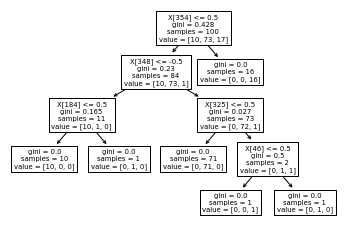

In [ ]:
#Give the city number as parameter to the below function
for col in df2.columns:
    regional_classifier(col)

In [ ]:
def top_10_predictors(col):
    Y_train2 = Train2[col]   
    X_train2 = Train2.drop(columns=[col])
    print(X_train2.shape)
    Y_test2 = Test2[col]
    X_test2 = Test2.drop(columns=[col])
   
    clf2 = tree.DecisionTreeClassifier(max_depth=10, criterion="gini")
    
    print("__________________________________________________________________________________")
    print(f"Top 10 predictor regions for city{col}:")
    print("Decision Tree:")
    print("------------------------------")
    clf2 = clf.fit(X_train2, Y_train2)
   
    feat_importances = pd.Series(clf2.feature_importances_, index=X_train2.columns)
    print("City"+"\nCity".join([str(val) for val in feat_importances.nlargest(10).index]))
    print()
        
    rfc2 = RandomForestClassifier(max_depth=10,criterion="gini")
   
    print("Random Forest:")
    print("------------------------------")
    rfc2 = rfc2.fit(X_train2, Y_train2)
    feat_importances = pd.Series(rfc2.feature_importances_, index=X_train2.columns)
    print("City"+"\nCity".join([str(val) for val in feat_importances.nlargest(10).index]))

In [ ]:
#top 10 predictors of city 0 are:
#top_10_predictors(0)
for col in df2.columns:
    top_10_predictors(col)

Streaming output truncated to the last 5000 lines.
City126
City104
City114

Random Forest:
------------------------------
City82
City72
City206
City66
City205
City318
City148
City231
City230
City150
(100, 356)
__________________________________________________________________________________
Top 10 predictor regions for city179:
Decision Tree:
------------------------------
City122
City180
City118
City150
City151
City48
City131
City245
City265
City198

Random Forest:
------------------------------
City122
City95
City151
City150
City94
City180
City198
City124
City2
City123
(100, 356)
__________________________________________________________________________________
Top 10 predictor regions for city180:
Decision Tree:
------------------------------
City153
City152
City124
City339
City301
City112
City175
City270
City292
City214

Random Forest:
------------------------------
City233
City153
City125
City214
City124
City270
City154
City102
City127
City181
(100, 356)
_________________________

# **Question 2**

In [ ]:
from keras.datasets import mnist

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#shape of dataset
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
 
#plotting
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [ ]:
train_X = train_X.reshape((train_X.shape[0], 28*28)).astype('float32')
test_X = test_X.reshape((test_X.shape[0], 28*28)).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=20)
classifier.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=20)

In [ ]:
classifier.score(test_X,test_y)

0.8794

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(classifier, train_X, train_y, cv=10)
print(scores)

[0.87516667 0.8715     0.85133333 0.883      0.86866667 0.86383333
 0.86616667 0.87483333 0.87266667 0.89083333]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(max_depth=20)
rfc2_scores = cross_val_score(rfc2, train_X, train_y, cv=10)
print(rfc2_scores)

[0.9705     0.96616667 0.9665     0.967      0.963      0.967
 0.96883333 0.9645     0.96616667 0.97666667]


In [ ]:
rfc2.fit(train_X, train_y)
classifier.score(test_X,test_y)

0.8794

In [ ]:
depths = [30,40,50]
for depth in depths:
  dt2 = DecisionTreeClassifier(max_depth=20)
  dt2.fit(train_X, train_y)
  print("Depth and Score:")
  print(depth)
  print(dt2.score(test_X,test_y))


Depth and Score:
30
0.8791
Depth and Score:
40
0.8782
Depth and Score:
50
0.8811


In [ ]:
depths = [30,40,50]
for depth in depths:
  rfc3 = RandomForestClassifier(max_depth=depth)
  rfc3.fit(train_X, train_y)
  print("Random Forest Depth and Score:")
  print(depth)
  print(rfc3.score(test_X,test_y))

Random Forest Depth and Score:
30
0.969
Random Forest Depth and Score:
40
0.9684
Random Forest Depth and Score:
50
0.9704
